In [ ]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


=== WINE QUALITY CLASSIFICATION ===

Wine Quality Results:
Accuracy: 0.5500

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.10      0.12        10
           5       0.65      0.65      0.65       130
           6       0.53      0.52      0.52       132
           7       0.43      0.50      0.46        42
           8       0.00      0.00      0.00         5

    accuracy                           0.55       320
   macro avg       0.30      0.30      0.29       320
weighted avg       0.54      0.55      0.55       320



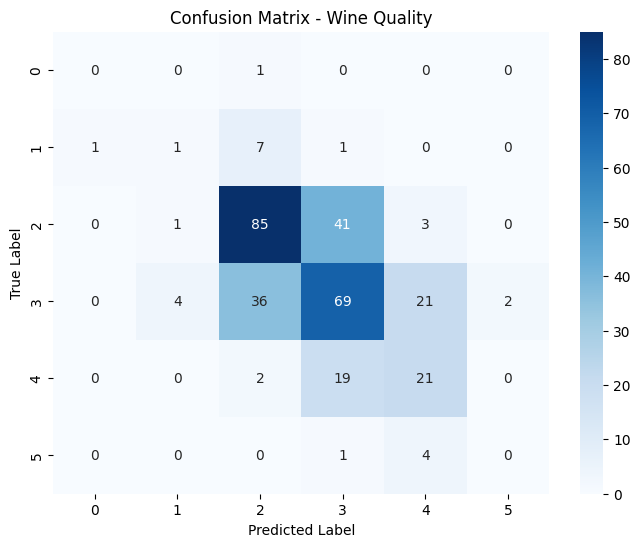

In [ ]:
print("\n=== WINE QUALITY CLASSIFICATION ===")

# Load wine data
wine_df = pd.read_csv('winequality-red.csv')
X_wine = wine_df.drop('quality', axis=1)
y_wine = wine_df['quality']

# Split wine data
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42)

# Train Gaussian Naive Bayes
wine_nb = GaussianNB()
wine_nb.fit(X_wine_train, y_wine_train)

# Make predictions
wine_predictions = wine_nb.predict(X_wine_test)

# Print results
print("\nWine Quality Results:")
print(f"Accuracy: {accuracy_score(y_wine_test, wine_predictions):.4f}")
print("\nClassification Report:")
print(classification_report(y_wine_test, wine_predictions))

# Plot confusion matrix
plot_confusion_matrix(y_wine_test, wine_predictions, 'Wine Quality')


=== BREAST CANCER CLASSIFICATION ===

Breast Cancer Results:
Accuracy: 0.9737

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



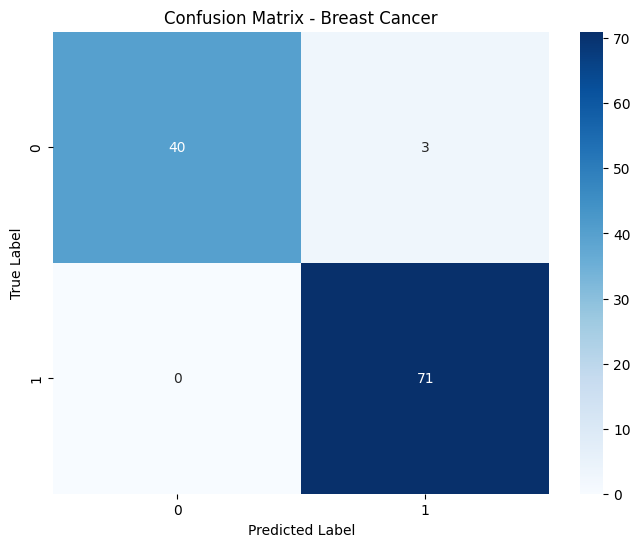

In [ ]:
print("\n=== BREAST CANCER CLASSIFICATION ===")

# Load cancer data
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y_cancer = cancer.target

# Split cancer data
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42)

# Train Gaussian Naive Bayes
cancer_nb = GaussianNB()
cancer_nb.fit(X_cancer_train, y_cancer_train)

# Make predictions
cancer_predictions = cancer_nb.predict(X_cancer_test)

# Print results
print("\nBreast Cancer Results:")
print(f"Accuracy: {accuracy_score(y_cancer_test, cancer_predictions):.4f}")
print("\nClassification Report:")
print(classification_report(y_cancer_test, cancer_predictions))

# Plot confusion matrix
plot_confusion_matrix(y_cancer_test, cancer_predictions, 'Breast Cancer')

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_loan_data(df):
    df = df.copy()

    # Convert to numeric, handling errors
    df['Dependents'] = df['Dependents'].replace('3+', '3')
    df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')

    # Fill missing values
    numeric_columns = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Dependents']
    categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

    # Fill numeric columns with mean
    for col in numeric_columns:
        df[col].fillna(df[col].mean(), inplace=True)

    # Fill categorical columns with mode
    for col in categorical_columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

    # Convert categorical to numerical
    df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
    df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
    df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
    df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
    df['Property_Area'] = df['Property_Area'].map({'Urban': 2, 'Semiurban': 1, 'Rural': 0})

    # Ensure all columns are numeric
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = pd.to_numeric(df[col], errors='coerce')

    return df

# Load data
loan_train = pd.read_csv('loan_sanction_train.csv')
loan_test = pd.read_csv('loan_sanction_test.csv')

# Preprocess data
loan_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                'Loan_Amount_Term', 'Credit_History', 'Property_Area']

# Preprocess train data
loan_train = preprocess_loan_data(loan_train)
X_train = loan_train[loan_features]
y_train = loan_train['Loan_Status'].map({'Y': 1, 'N': 0})

# Preprocess test data
loan_test = preprocess_loan_data(loan_test)
X_test = loan_test[loan_features]

# Create and train model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)
prediction_proba = model.predict_proba(X_test)

# Function to predict loan approval
def predict_loan(features):
    # Ensure features are numeric
    features = pd.to_numeric(features, errors='coerce')
    prob = model.predict_proba([features])[0]
    pred = 'Approved' if model.predict([features])[0] == 1 else 'Not Approved'
    return {
        'Prediction': pred,
        'Probability': f"{max(prob):.2%}"
    }

# Print model performance
print("\nModel Performance:")
print(f"Features used: {loan_features}")
print("\nSample Prediction:")
sample_features = X_test.iloc[0]
print(predict_loan(sample_features))

# Visualize feature importance using mean values for each class
plt.figure(figsize=(12, 6))
feature_means = []
for feature in loan_features:
    class_0_mean = X_train[y_train == 0][feature].mean()
    class_1_mean = X_train[y_train == 1][feature].mean()
    feature_means.append(abs(class_1_mean - class_0_mean))

feature_importance = pd.DataFrame({
    'Feature': loan_features,
    'Importance': feature_means
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xticks(rotation=45)
plt.title('Feature Importance based on Class Mean Differences')
plt.tight_layout()
plt.show()

# Print confusion matrix
y_pred = model.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_train, y_pred))

# Feature distributions
plt.figure(figsize=(15, 5))
for i, feature in enumerate(loan_features[:3]):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(data=X_train, x=feature, hue=y_train)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

<ipython-input-6-5673bef2b872>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-6-5673bef2b872>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

ValueError: Input y contains NaN.